<h1 align='center'> Neural Network from Scratch </h1>
<h3 align='center'> Introduction to Activation Functions </h3>

In [8]:
import numpy as np
import nnfs

import matplotlib.pyplot as plt

## What are Activation Functions?
This is a function that is used to calculate the output that activates a neuron. An activation function determines what value a particular Neuron should have inorder to fire that neuron. It comes into play after the (inputs*weights) + bias.
- Some examples of Activation Functions are:
    - **Identity Function** --> Used prominently in the Input Layer.
    - **Step Function** --> If the Input to this function is greater than 0 then the Output is 1. Otherwise, the Output is 0. The Output of this activation function is either 0 or 1.
    - **Sigmoidal Function** --> The name is due to its S-shaped plot. This came into play because *Step Function* can't be applied in all Neural Networks. The Output of this activation function is in the range of 0 to 1.
    - **Rectified Linear Unit (RELU) Function** --> This is the most popular Activation Function for hidden layers and it is easy as well. It checks for the maximum value of x(i.e (inputs*weights) + bias) and 0. If x is negative then the Output of the neuron is 0 else it is x.
    - **Softmax Function** --> 

### Rectified Linear Unit (ReLU) Function

In [4]:
inputs = [0, 2, -1, 3.3, -2.7, 1.1, 2.2, -100]
output = []

for i in inputs:
    output.append(max(0,i))
    
print(output)

[0, 2, 0, 3.3, 0, 1.1, 2.2, 0]


<h2 align= 'center'>OR</h2>

## Rectified Linear Unit (ReLU) Object

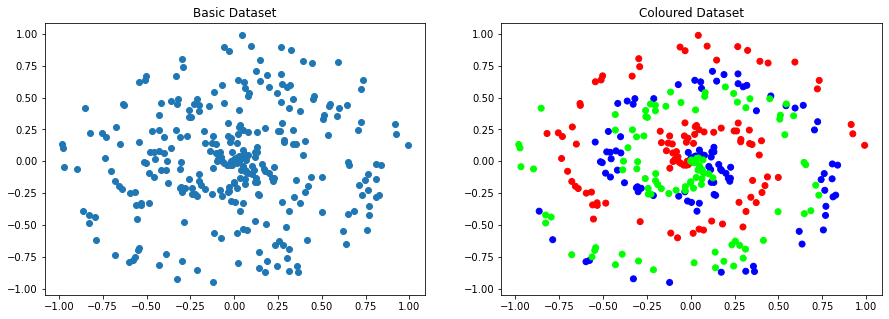

In [14]:
## Generating the data
def Create_Data(points, classes):
    X= np.zeros((points*classes, 2))
    y = np.zeros(points*classes, dtype= 'uint8')
    for class_number in range(classes):
        ix = range(points*class_number, points*(class_number + 1))
        r = np.linspace(0.0, 1, points)     ## Radius
        t = np.linspace(class_number*4, (class_number + 1)*4, points) + np.random.randn(points)*0.2
        X[ix] = np.c_[r*np.sin(t*2.5), r*np.cos(t*2.5)]
        y[ix] = class_number
    return X, y


X,y = Create_Data(100, 3)   ## 3 classes of 100 Feature sets
plt.figure(figsize= (15, 5))

plt.subplot(1,2,1)
plt.scatter(X[:,0], X[:,1])
plt.title('Basic Dataset')

plt.subplot(1,2,2)
plt.scatter(X[:,0], X[:,1], c= y, cmap= 'brg')
plt.title('Coloured Dataset')
plt.show()

In [25]:
from nnfs.datasets import spiral_data

nnfs.init()
X, y = spiral_data(100, 3)

# Hidden Layers
class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.10 * np.random.randn(n_inputs, n_neurons)   ## For this we need to know the size of the inputs coming in and the size of the neurons in the hidden layer.
        self.biases = np.zeros((1, n_neurons))
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases


class Activation_ReLU:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)

layer1 = Layer_Dense(2, 5)
activation1 = Activation_ReLU()

layer1.forward(X)
print('Before Activation Function')
print(layer1.output)
print()
print()
print('After Activation Function')
activation1.forward(layer1.output)
print(activation1.output)

Before Activation Function
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [-8.35815910e-04 -7.90404272e-04 -1.33452227e-03  4.65504505e-04
   4.56846210e-05]
 [-2.39994470e-03  5.93469958e-05 -2.24808278e-03  2.03573116e-04
   6.10024377e-04]
 ...
 [ 1.13291524e-01 -1.89262271e-01 -2.06855070e-02  8.11079666e-02
  -6.71350807e-02]
 [ 1.34588361e-01 -1.43197834e-01  3.09493970e-02  5.66337556e-02
  -6.29687458e-02]
 [ 1.07817926e-01 -2.00809643e-01 -3.37579325e-02  8.72561932e-02
  -6.81458861e-02]]


After Activation Function
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 4.65504505e-04
  4.56846210e-05]
 [0.00000000e+00 5.93469958e-05 0.00000000e+00 2.03573116e-04
  6.10024377e-04]
 ...
 [1.13291524e-01 0.00000000e+00 0.00000000e+00 8.11079666e-02
  0.00000000e+00]
 [1.34588361e-01 0.00000000e+00 3.09493970e-02 5.66337556e-02
  0.00000000e+00]
 [1.07817926e-01 0.00000